# Assignment 1
## Laura Contreras

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1 Loading in diabetes dataset

Data Loading and Preparation. Load the diabetes dataset into two numpy arrays: one for the feature set and one for the target. Pick asingle feature to try to predict the target (disease progression). Document thereason you chose the feature you did. Break your single feature and target setsinto training and test sets with the last 20 rows being in the test set.

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
db_data = load_diabetes()
print(db_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
type(db_data)

sklearn.utils.Bunch

In [385]:
feats = db_data['data']
target = db_data['target']

In [386]:
print(type(feats))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


For this assignment I will be choosing s6 (glu, blood sugar level) as my single feature to predict the target variable (disease progression). My reasoning is that I think a low or high blood sugar level will have an effect on progression of diabetes. 

In [387]:
s6_feats = feats[:, 9]

In [388]:
# s6 train and test set, test set has the last 20 rows
s6_test = s6_feats[421:].reshape(-1,1)
s6_train = s6_feats[:421].reshape(-1,1)

# target train and test set, test set has the last 20 rows
target_test = target[421:].reshape(-1,1)
target_train = target[:421].reshape(-1,1)

In [389]:
# type check
type(s6_test)

numpy.ndarray

In [390]:
# visual check
target_test

array([[212.],
       [233.],
       [ 91.],
       [111.],
       [152.],
       [120.],
       [ 67.],
       [310.],
       [ 94.],
       [183.],
       [ 66.],
       [173.],
       [ 72.],
       [ 49.],
       [ 64.],
       [ 48.],
       [178.],
       [104.],
       [132.],
       [220.],
       [ 57.]])

## Part 2 Model Training

Model Training. Instantiate a linear regression model, and train it with your single feature and target sets.

In [391]:
from sklearn.linear_model import LinearRegression

In [392]:
# create and train model
lm = LinearRegression()
lm.fit(s6_train, target_train)

LinearRegression()

Here we have trained the model with the s6 feature and the target training sets. Below we will look at how the model did using the test set. 

## Part 3 Prediction and Measurement

Prediction and measurement. List the first 10 predictions on your single feature test set. Print out the feature coefficient and the root mean squared error of your model.

### Predictions on Training Set

In [393]:
preds_train = lm.predict(s6_train)

In [394]:
print("First 10 predictions ")
preds_train[:10]

First 10 predictions 


array([[142.43051746],
       [ 95.48015082],
       [137.21381006],
       [147.64722486],
       [124.17204154],
       [ 92.87179712],
       [129.38874895],
       [155.47228597],
       [160.68899338],
       [145.03887116]])

In [395]:
# Extracting the feature coefficient
lm.coef_

array([[629.71665288]])

The feature coefficient is 629.71665.

In [396]:
# Calculating the root mean squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(target_train, preds_train, squared=False)
rmse

71.14690436181795

The rmse obtained is 71.1469

### Predictions on Test set

In [397]:
preds_test = lm.predict(s6_test)

In [398]:
print("First 10 predictions ")
preds_test[:10]

First 10 predictions 


array([[163.29734708],
       [147.64722486],
       [124.17204154],
       [168.51405448],
       [121.56368784],
       [207.63936002],
       [173.73076189],
       [236.33125074],
       [129.38874895],
       [142.43051746]])

In [399]:
# Extracting the feature coefficient
lm.coef_

array([[629.71665288]])

The feature coefficient is 629.71665.

In [400]:
# Calculating the root mean squared error
rmse = mean_squared_error(target_test, preds_test, squared=False)
rmse

71.55005912812985

The rmse obtained is 71.550059.

## Part 4 Visualization
Visualization. Print out a scatter plot with the feature you chose on the x-axis, and progression on the y-axis. Plot the regression line on this same graph with appropriate labels on each axis.

### Plot using Training Set

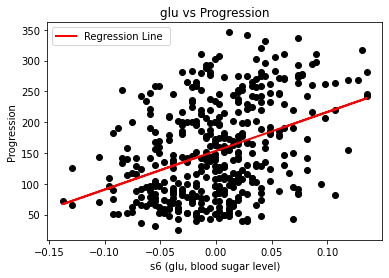

In [401]:
plt.scatter(s6_train, target_train, color="black")
plt.plot(s6_train, preds_train, color="red", linewidth=2, label="Regression Line ")
plt.xlabel('s6 (glu, blood sugar level)') 
plt.ylabel('Progression')
plt.title("glu vs Progression")
plt.legend(loc='best')
plt.show()

#### Actual vs Prediction (Training)

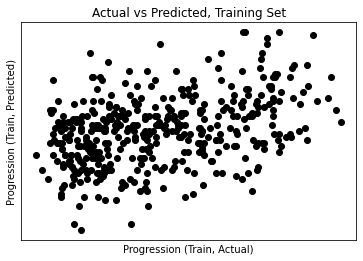

In [402]:
plt.scatter(x = target_train, y = preds_train, color ='black') 
plt.xlabel('Progression (Train, Actual)')
plt.ylabel('Progression (Train, Predicted)')
plt.title('Actual vs Predicted, Training Set')
plt.xticks(())
plt.yticks(())
plt.show()

If the model was accurate we would see a diagonal line in the actual vs predicted values. We see a lot a of variablilty in the data.

### Plot using Test Set

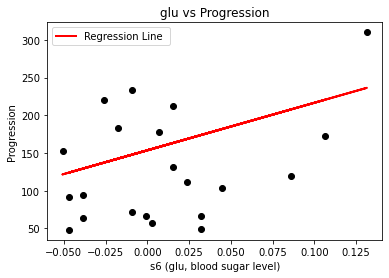

In [403]:
plt.scatter(s6_test, target_test, color="black")
plt.plot(s6_test, preds_test, color="red", linewidth=2, label="Regression Line ")
plt.xlabel('s6 (glu, blood sugar level)') 
plt.ylabel('Progression')
plt.title("glu vs Progression")
plt.legend(loc='best')
plt.show()

#### Actual vs Prediction (Test)

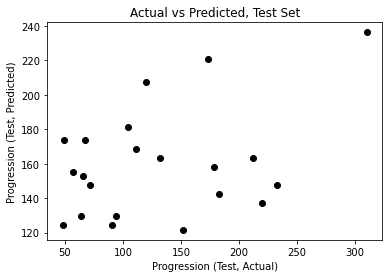

In [404]:
plt.scatter(x = target_test, y = preds_test, color = 'black') 
plt.xlabel('Progression (Test, Actual)')
plt.ylabel('Progression (Test, Predicted)')
plt.title('Actual vs Predicted, Test Set')
plt.show()

If the model was accurate we would see a diagonal line in the actual vs predicted values. We see a lot a of variablilty in the data. 